# Numerical Stability

In [1]:
using Distributions
using HMMBase
using PyPlot
using Seaborn

rc("axes", xmargin = 0) # hide
set_style("whitegrid")  # hide

Let's consider the case of a Normal distribution with null variance,
such a case can appear during maximum likelihood estimation if only
one observation is associated to a state:

In [2]:
A = [0.99 0.01; 0.1 0.9]
B = [Normal(0, 1), Normal(10.5, 0)]
hmm = HMM(A, B)

HMMBase.HMM{Distributions.Univariate,Float64}([0.5, 0.5], [0.99 0.01; 0.1 0.9], Distributions.Distribution{Distributions.Univariate,S} where S<:Distributions.ValueSupport[Distributions.Normal{Float64}(μ=0.0, σ=1.0), Distributions.Normal{Float64}(μ=10.5, σ=0.0)])

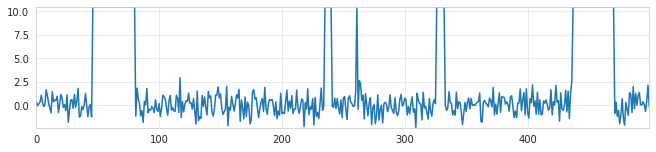

In [3]:
y = rand(hmm, 500)
figure(figsize = (9, 2)) # hide
plot(y)
gcf() # hide

The likelihood of a Normal distribution with null variance goes to infinity for `y = μ`,
as there is a division by zero in the density function:

In [4]:
println(extrema(loglikelihoods(hmm, y)))

(-Inf, Inf)


To avoid propagating these non-finite quantities (for example in the forward-backward algorithm),
you can use the `robust` option:

In [5]:
println(extrema(loglikelihoods(hmm, y, robust = true)))

(-1.7976931348623157e308, 709.782712893384)


This truncates `+Inf` to the largest Float64, and `-Inf` to the smallest Float64:

In [6]:
log(prevfloat(Inf)), nextfloat(-Inf)

(709.782712893384, -1.7976931348623157e308)

---

*This notebook was generated using [Literate.jl](https://github.com/fredrikekre/Literate.jl).*